<a href="https://colab.research.google.com/github/elizamelo/Analise-Dados-FAE/blob/main/2024_01/RooFit/ROOTnoColab_Aula04Data2024_01_Exemplos10_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1XlUrz2_dcKnsbHfTUvY8a8RATATr9XBX#scrollTo=0sRCsFc7JClS
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  inflating: ro

In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-04-08 23:55:08--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.82, 185.125.190.39, 185.125.190.36, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M   928KB/s    in 1.4s    

2024-04-08 23:55:10 (928 KB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121903 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5ae5041e94b0 at 0x79645ef83220>

In [8]:
#Block to import all the ROOT functions that we will be using throughout this template
# Importamos as classes necessárias
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar, RooGenericPdf, RooWorkspace
from ROOT import RooDataHist, RooCategory, RooPolynomial, RooAddPdf
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooVoigtian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom, gROOT
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD
from ROOT import RooRealVar, RooChebychev, kDashed, kYellow, gDirectory, kDotted



*Exemplo 10a*

Ref.:https://github.com/clelange/roofit/blob/master/rf502_wspacewrite.py

Criar modelos de ajuste e gerar conjuntos de dados simulados para posterior análise estatística e modelagem.

In [9]:
# Declare observable x
x = RooRealVar("x", "x", 0, 10)

# Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
# their parameters
mean = RooRealVar("mean", "mean of gaussians", 5, 0, 10)
sigma1 = RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = RooRealVar("sigma2", "width of gaussians", 1)

sig1 = RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

# Build Chebychev polynomial p.d.f.
a0 = RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg = RooChebychev("bkg", "Background", x, RooArgList(a0, a1))

# Sum the signal components into a composite signal p.d.f.
sig1frac = RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = RooAddPdf(
    "sig", "Signal", RooArgList(sig1, sig2), RooArgList(sig1frac))

# Sum the composite signal and background
bkgfrac = RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = RooAddPdf(
    "model", "g1+g2+a", RooArgList(bkg, sig), RooArgList(bkgfrac))

# Generate a data sample of 1000 events in x from model
data = model.generate(RooArgSet(x), 1000)

# Create a empty workspace
w = RooWorkspace("w", "workspace")

# Import model and all its components into the workspace
getattr(w, 'import')(model)

# Import data into the workspace
getattr(w, 'import')(data)

# Save the workspace into a ROOT file
w.writeToFile("model.root")

# Workspace will remain in memory after macro finishes
gDirectory.Add(w)


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [-1e+30, 1e+30] of the RooGaussian 'sig2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooChebychev::bkg
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::x
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::a0
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::a1
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::bkgfrac
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddPdf::sig
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooGaussian::sig1
[#1] INFO:ObjectHandling -- RooW

**Exemplo 10b:**

Ref.:https://github.com/clelange/roofit/blob/master/rf503_wspaceread.py

Iremos lê um workspace do arquivo "model.root", ajustar o modelo aos dados, plotar o modelo e os dados em um frame e salvar a visualização em um arquivo de imagem.

Isso é útil para análise de dados e visualização de ajustes de modelos e análises estatísticas.



0x5ae512780990 RooAddPdf::model = 1/1 [Auto,Clean] 
  0x5ae512367c90/V- RooChebychev::bkg = 1 [Auto,Dirty] 
    0x5ae5119c29b0/V- RooRealVar::x = 5
    0x5ae51276f190/V- RooRealVar::a0 = 0.5
    0x5ae51236d040/V- RooRealVar::a1 = 0
  0x5ae51199a920/V- RooRealVar::bkgfrac = 0.5
  0x5ae5127626e0/V- RooAddPdf::sig = 1/1 [Auto,Clean] 
    0x5ae512363f90/V- RooGaussian::sig1 = 1 [Auto,Dirty] 
      0x5ae5119c29b0/V- RooRealVar::x = 5
      0x5ae512784290/V- RooRealVar::mean = 5
      0x5ae5123635c0/V- RooRealVar::sigma1 = 0.5
    0x5ae51199db80/V- RooRealVar::sig1frac = 0.8
    0x5ae5127702b0/V- RooGaussian::sig2 = 1 [Auto,Dirty] 
      0x5ae5119c29b0/V- RooRealVar::x = 5
      0x5ae512784290/V- RooRealVar::mean = 5
      0x5ae51277a7d0/V- RooRealVar::sigma2 = 1
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (bkg,sig1,sig2)
 **********
 **   46 **SET

Warning in <TCanvas::Constructor>: Deleting canvas with same name: wspaceread
Info in <TCanvas::Print>: png file wspaceread.png has been created


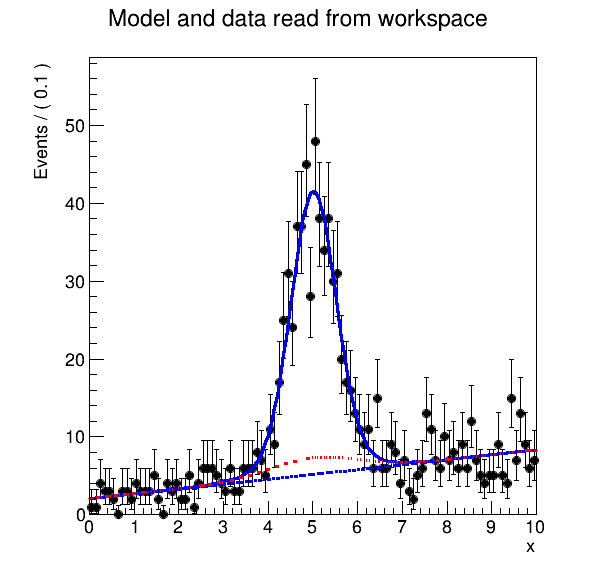

In [13]:
#!wget https://github.com/elizamelo/Analise-Dados-FAE/raw/main/2024_01/RooFit/model.root


# R e a d   w o r k s p a c e   f r o m   f i l e
# -----------------------------------------------
# Open input file with workspace (generated by rf14_wspacewrite)
f = TFile("model.root")

# Retrieve workspace from file
w = f.Get("w")

# R e t r i e v e   p d f , a t a   f r o m   w o r k s p a c e
# -----------------------------------------------------------------

# Retrieve x, and data from workspace
x = w.var("x")
model = w.pdf("model")
data = w.data("modelData")

# Print structure of composite p.d.f.
model.Print("t")

# F i t   m o d e l   t o   d a t a , l o t   m o d e l
# ---------------------------------------------------------

# Fit model to data
model.fitTo(data)

# Plot data and PDF overlaid
xframe = x.frame(RooFit.Title("Model and data read from workspace"))
data.plotOn(xframe)
model.plotOn(xframe)

# Overlay the background component of model with a dashed line
model.plotOn(xframe, RooFit.Components("bkg"), RooFit.LineStyle(kDashed))

# Overlay the background+sig2 components of model with a dotted line
model.plotOn(xframe, RooFit.Components("bkg,sig2"),RooFit.LineStyle(kDotted),RooFit.LineColor(kRed))

# Draw the frame on the canvas
c = TCanvas("wspaceread", "wspaceread", 600, 600)
gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()
c.Draw()
c.SaveAs("wspaceread.png")

